In [2]:
import pandas as pd
import numpy as np
import os

<html><body>Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)</body></html>

In [61]:
path_date = list(os.walk(r'C:\Users\asus\Desktop\DA_projects\karpov\band4\task2\data'))
path_date

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [139]:
df = pd.DataFrame()
name_date = []
for date in path_date:
    for c_path,dirs,files in os.walk(r'C:\Users\asus\Desktop\DA_projects\karpov\band4\task2\data'+'/'+date):
        for file in files:
            name = c_path.replace('\\','/').split('/')[-1]
            date = c_path.replace('\\','/').split('/')[-2]
            current_df = pd.read_csv(c_path+'/'+file)
            current_df['name'] = name
            current_df['date'] = date
            df = pd.concat((df,current_df))

In [140]:
df = df.drop('Unnamed: 0',axis=1)

In [141]:
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


<html><body>Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.</body></html>

In [144]:
df.groupby('name').agg({'quantity':'sum'}).idxmax()

quantity    Alexey_Smirnov
dtype: object

<html><body>Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?</body></html>

In [174]:
product_sum = df.groupby('product_id',as_index=False) \
    .agg({'quantity':'sum'}).sort_values(by='quantity',ascending=False).head(10)

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

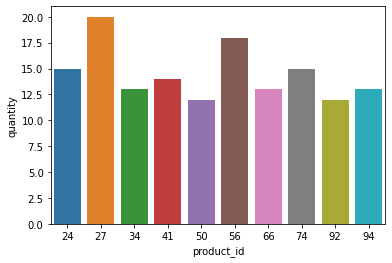

In [175]:
sns.barplot(data=product_sum,x='product_id',y='quantity')
plt.show()

<html><body>Визуализируйте продажи по дням.</body></html>

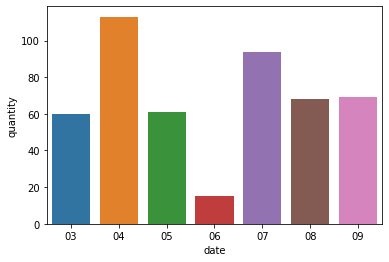

In [186]:
day_sells = df.groupby('date',as_index=False) \
    .agg({'quantity':'sum'})
sns.barplot(x=day_sells['date'].apply(lambda x:x[8:]),y=day_sells['quantity'])
plt.show()

<html><body>Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 
</body></html>

In [208]:
df.groupby(['name','date']).agg({'date':'nunique'}).query("date!=1").shape[0]

0